Some Questions that can be answered through the analysis:

Can you count something interesting?

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

In [4]:
data = pd.read_csv("online_shoppers_intention.csv")

In [4]:
data.shape

(12330, 18)

#### The csv file has 12330 rows and 18 features.

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
# Calculating statistical parameters for the given data.

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### The data does not have any null values.

### Univariate analysis

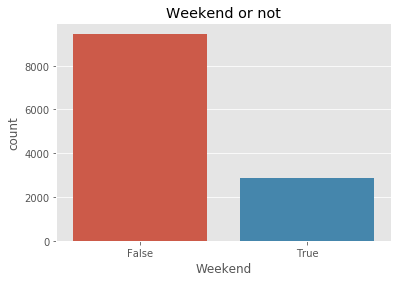

In [10]:
sns.countplot(data['Weekend'])
plt.title('Weekend or not')
plt.show()

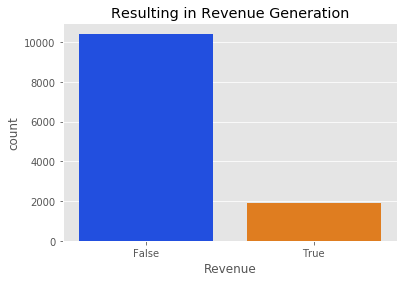

In [12]:
sns.countplot(data['Revenue'], palette = "bright")
plt.title('Resulting in Revenue Generation')
plt.show()

In [ ]:
# The target column is imbalanced thus it might give biased results.

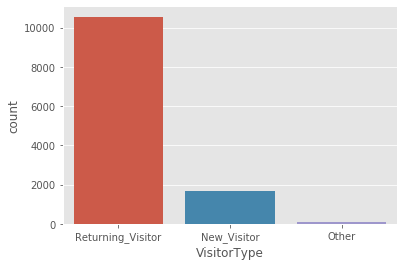

In [22]:
plt.xlabel("Visitor Type")
sns.countplot(data['VisitorType'])

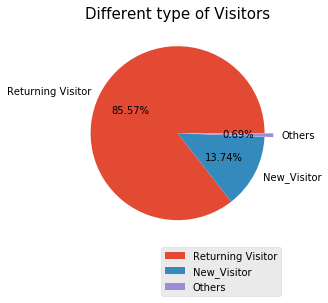

In [14]:
vis_type = data["VisitorType"].value_counts()
vis_type

explode = [0, 0, 0.1]
labels = "Returning Visitor", "New_Visitor", "Others"
plt.pie(vis_type, labels = labels, autopct = '%.2f%%', explode = explode)
plt.title('Different type of Visitors', fontsize = 15)
plt.legend(loc = "upper right", bbox_to_anchor=(1,0))
plt.show()

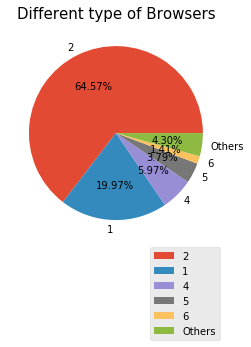

In [15]:
brow_type = [7961, 2462, 736, 467, 174, 530]
labels = ["2", "1", "4", "5", "6", "Others"]
plt.pie(brow_type, labels = labels, autopct = '%.2f%%')
plt.title('Different type of Browsers', fontsize = 15)
plt.legend(loc = "upper right", bbox_to_anchor=(1,0))
plt.show()

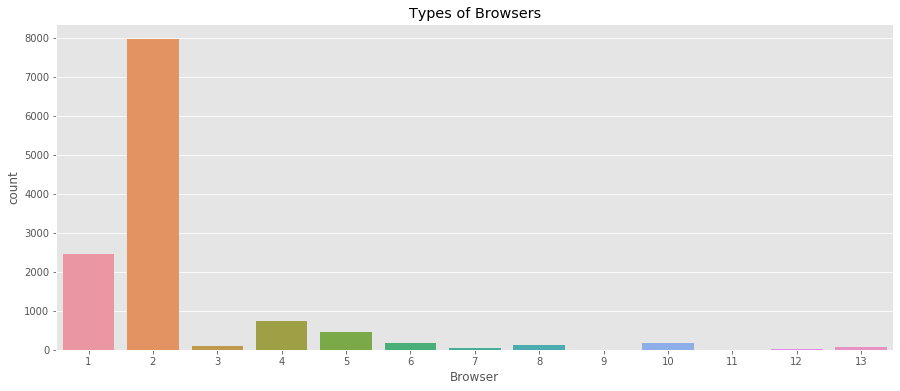

In [24]:
plt.figure(figsize=(15,6))
plt.title("Types of Browsers")
plt.xlabel("BrowserType")
sns.countplot(data['Browser'])

Text(0, 0.5, 'Count')

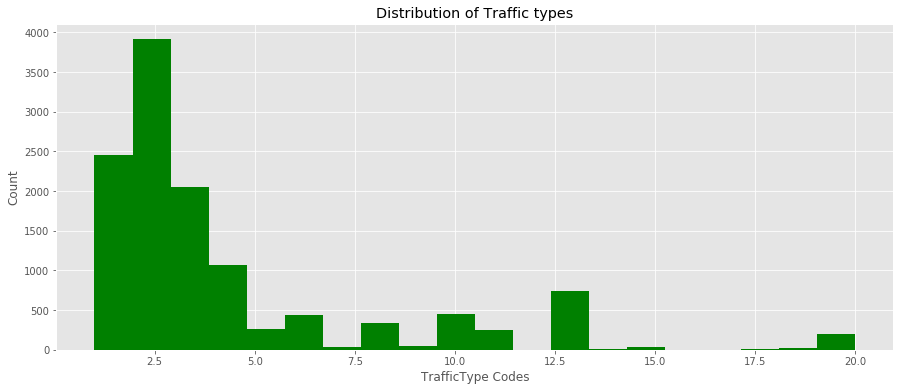

In [25]:
plt.figure(figsize=(15,6))
plt.hist(data['TrafficType'], bins = 20, color = "green")
plt.title('Distribution of Traffic types')
plt.xlabel('TrafficType Codes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

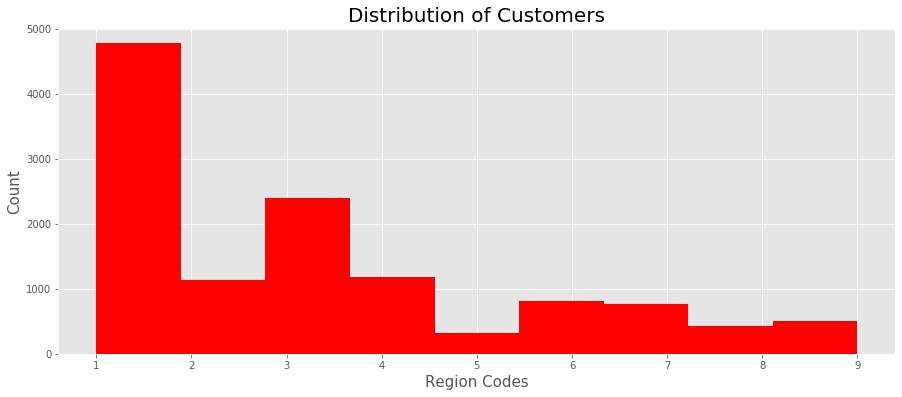

In [26]:
plt.figure(figsize=(15,6))
plt.hist(data['Region'], color = 'red', bins = 9)
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

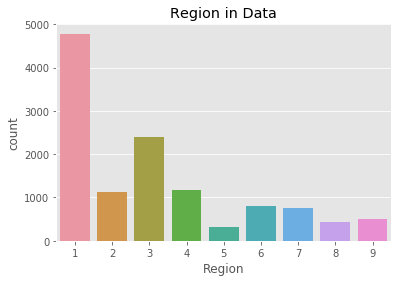

In [27]:
plt.title("Region in Data")
plt.xlabel("Region")
sns.countplot(data['Region'])

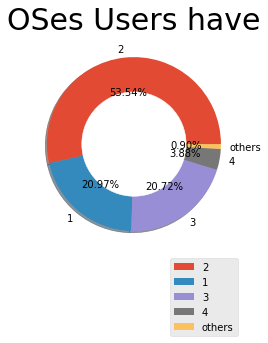

In [18]:
size = [6601, 2585, 2555, 478, 111]
labels = "2", "1","3","4","others"

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(loc = "upper right", bbox_to_anchor=(1,0))

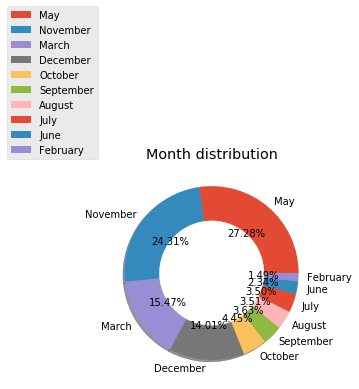

In [20]:
month_type = data["Month"].value_counts()
month_type

labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(month_type, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Month distribution')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(loc = "lower right", bbox_to_anchor = (0,1))

In [ ]:
# The above graph shows that the data for some months are more than the others combined.

### Bivariate & Multivariate Analysis 

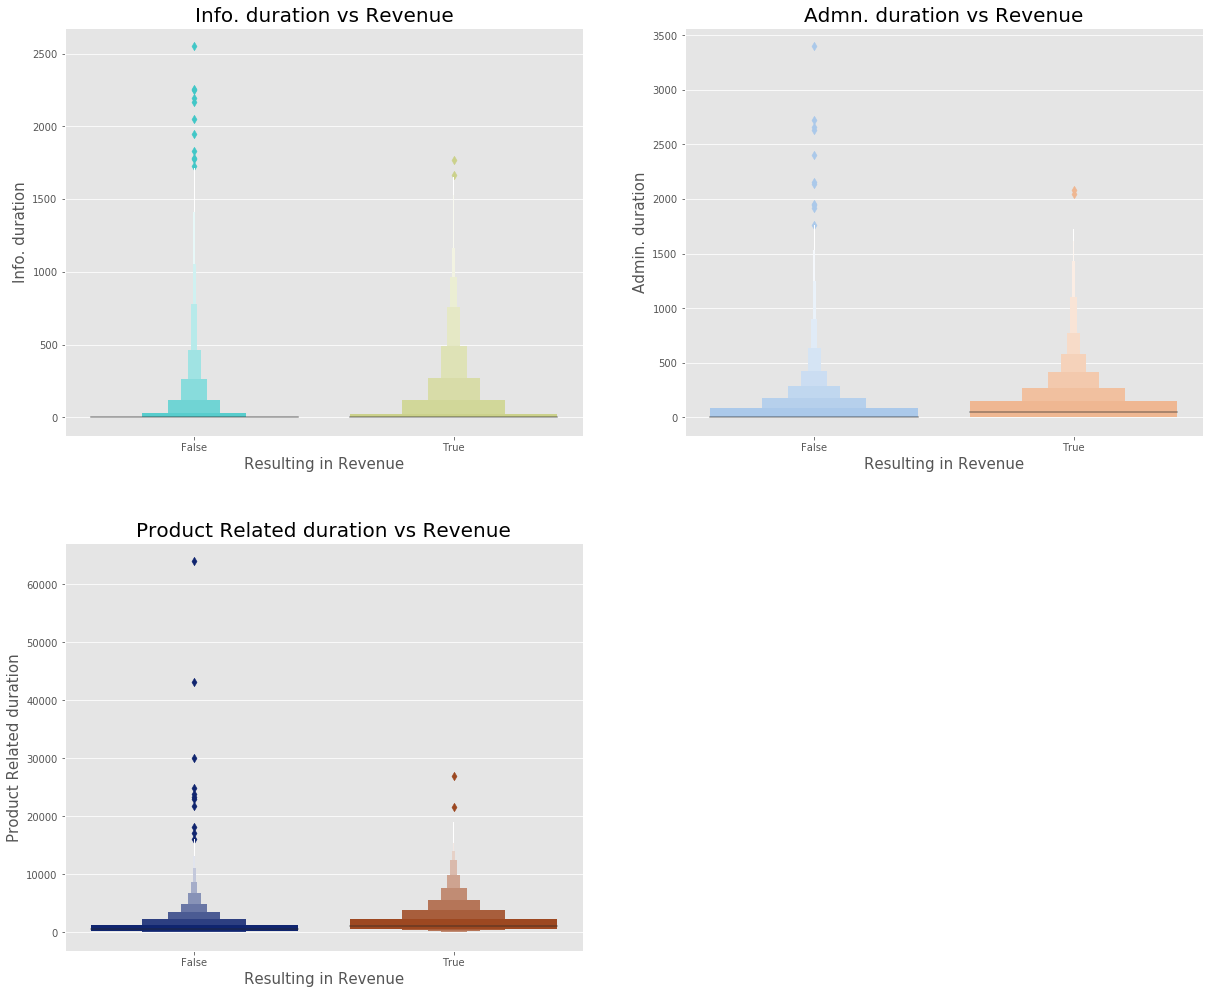

In [73]:
plt.subplot(221)
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Info. duration', fontsize = 15)

plt.subplot(222)
sns.boxenplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Admin. duration', fontsize = 15)

plt.subplot(223)
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Product Related duration', fontsize = 15)
plt.tight_layout(pad = 5.0)

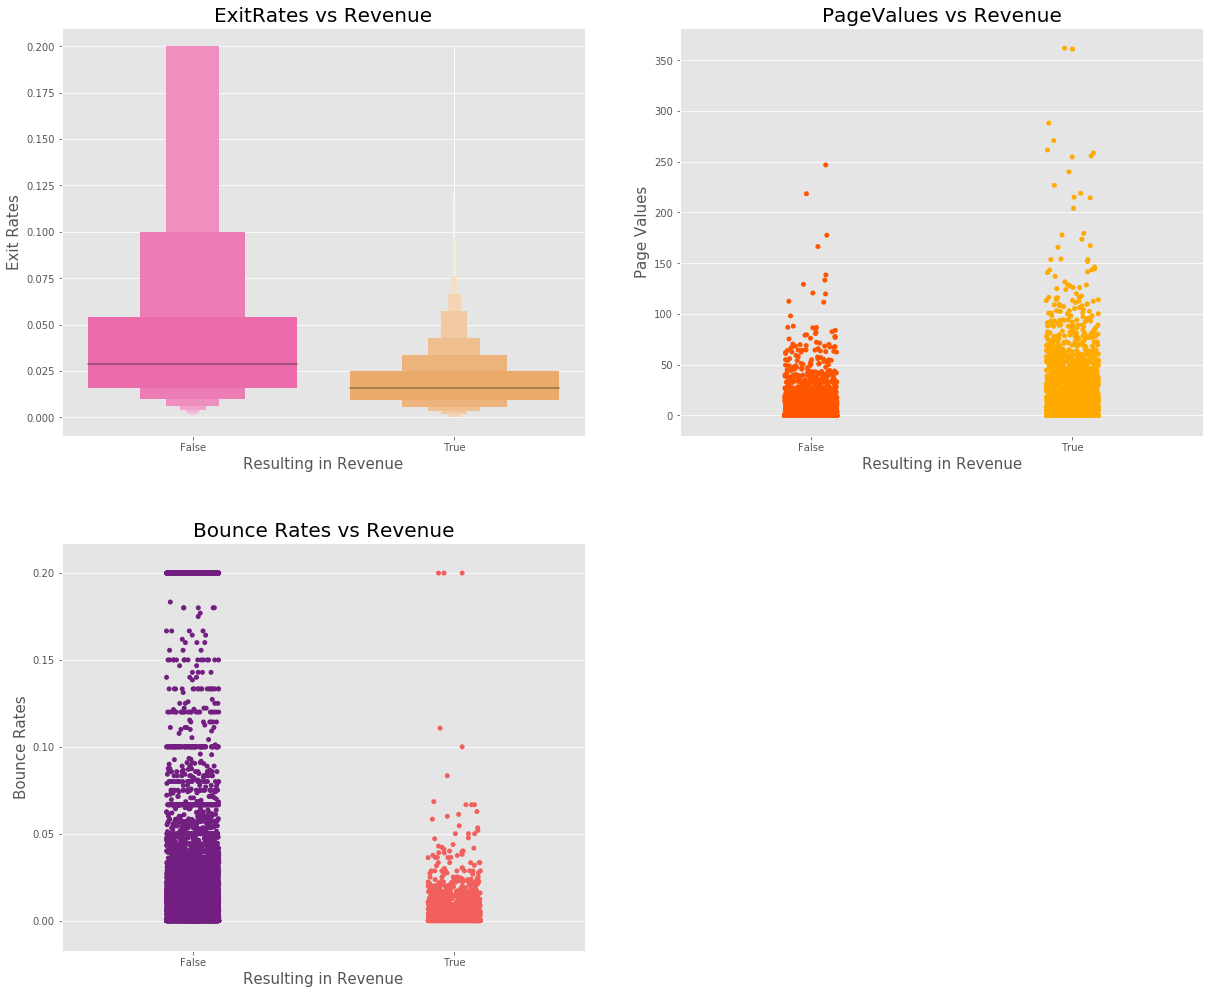

In [77]:
plt.subplot(221)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Exit Rates', fontsize = 15)


plt.subplot(222)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Page Values', fontsize = 15)

# bounce rates vs revenue
plt.subplot(223)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Resulting in Revenue', fontsize = 15)
plt.ylabel('Bounce Rates', fontsize = 15)
plt.tight_layout(pad = 5.0)

In [ ]:
# From the above graphs, we can see that the pages having high Page Values usually result in Revenue.
# In case of high Bounce Rates and high Exit Rates, the revenue is usually False.

Text(0.5, 1.0, 'Weekend vs Revenue')

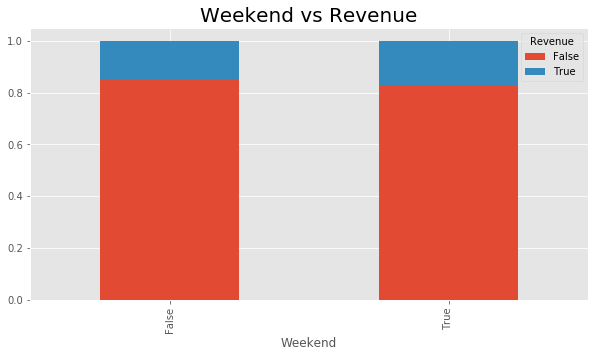

In [89]:
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Weekend vs Revenue', fontsize = 20)


Text(0.5, 1.0, 'Month vs SpecialDay')

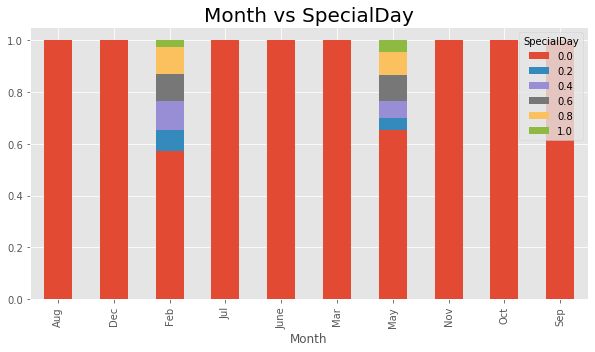

In [49]:
df = pd.crosstab(data['Month'], data['SpecialDay'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Month vs SpecialDay', fontsize = 20)

Text(0.5, 0, 'Traffic Types')

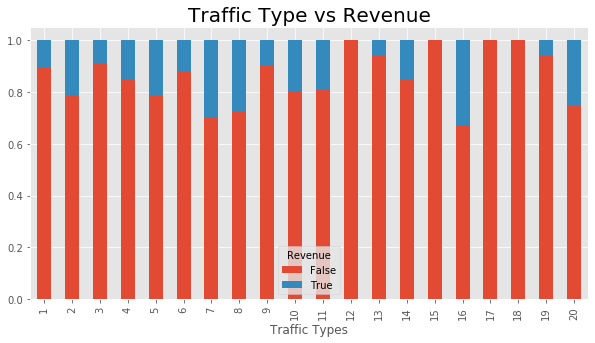

In [97]:

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.xlabel("Traffic Types")
#plt.legend(loc = "upper right", bbox_to_anchor=(0,1))

Text(0.5, 1.0, 'Visitor Type vs Revenue')

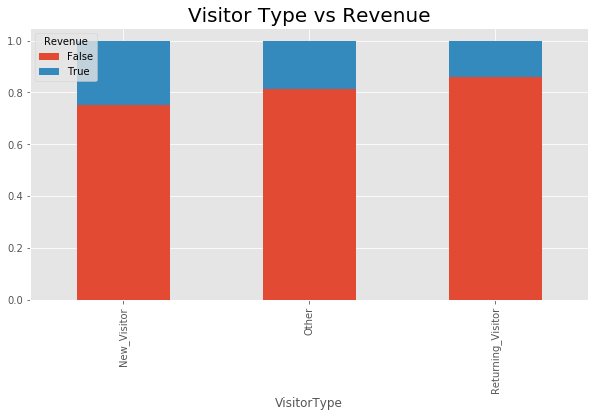

In [45]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Visitor Type vs Revenue', fontsize = 20)

Text(0.5, 1.0, 'Region vs Revenue')

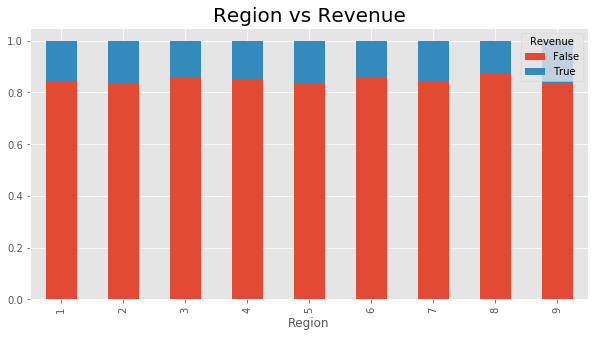

In [46]:
df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Region vs Revenue', fontsize = 20)

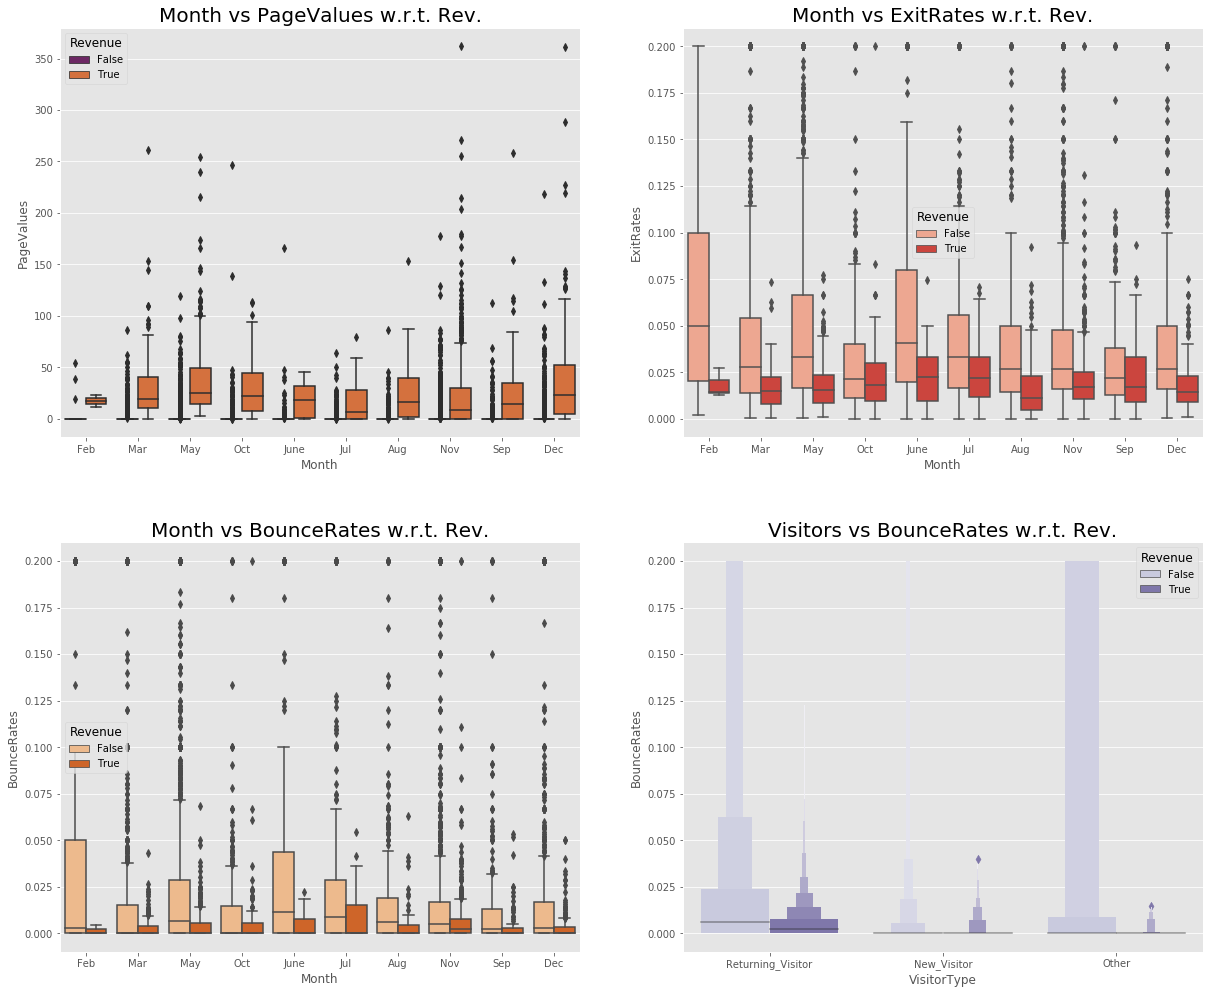

In [103]:

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'inferno')
plt.title('Month vs PageValues w.r.t. Rev.', fontsize = 20)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates w.r.t. Rev.', fontsize = 20)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates w.r.t. Rev.', fontsize = 20)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxenplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)

plt.tight_layout(pad = 5.0)
plt.show()

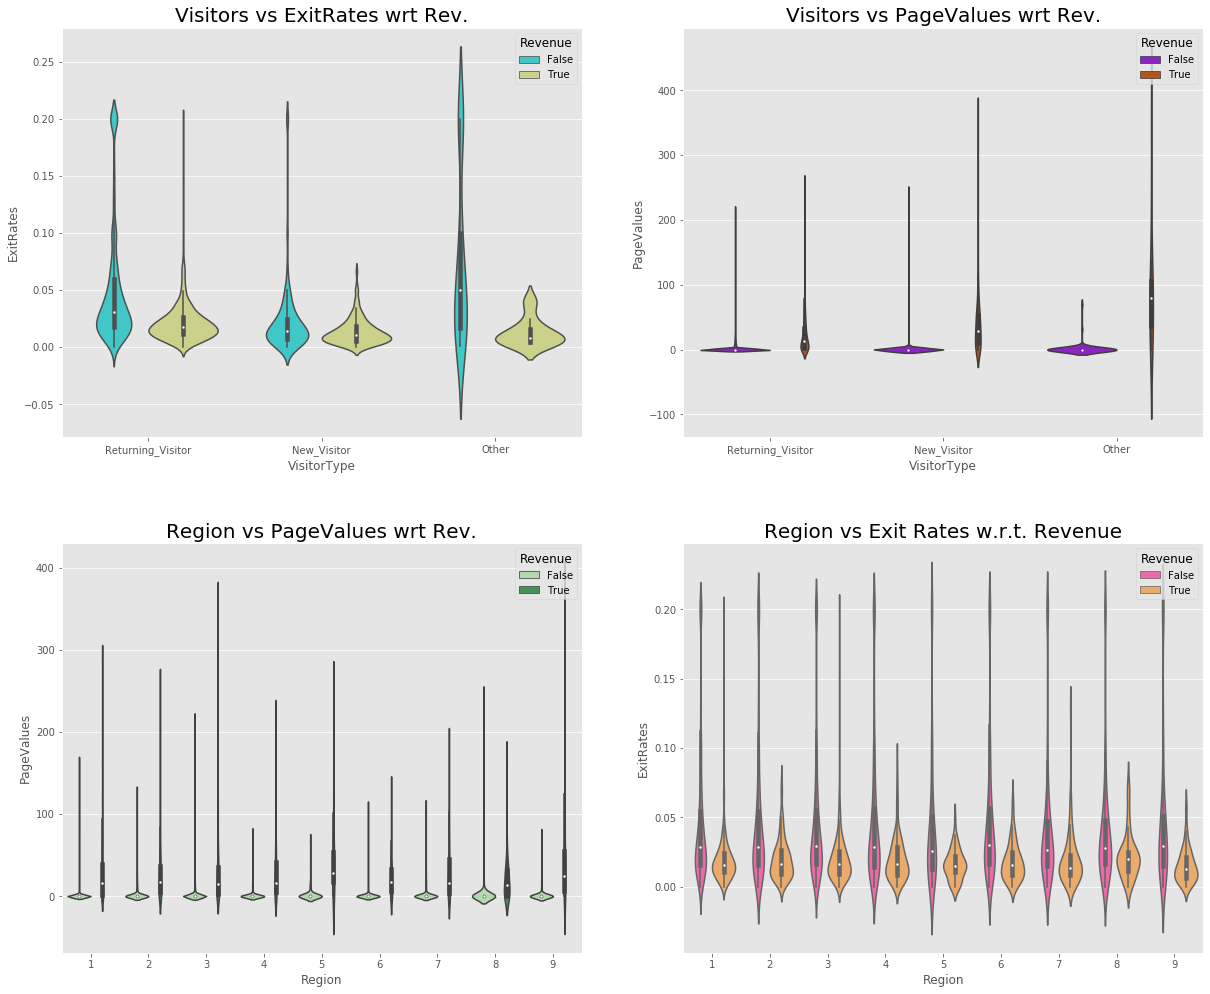

In [104]:
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 20)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 20)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 20)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 20)

plt.tight_layout(pad = 5.0)
plt.show()

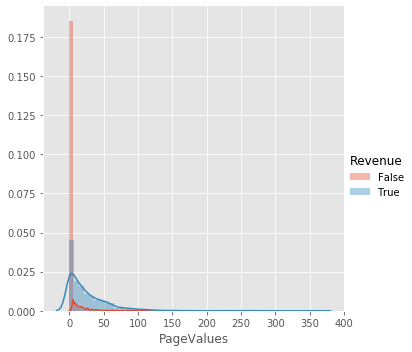

In [49]:
sns.FacetGrid(data, hue="Revenue", height=5).map(sns.distplot, "PageValues").add_legend()

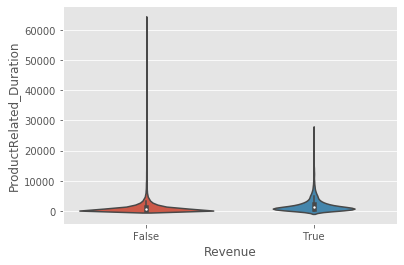

In [32]:
sns.violinplot(x = "Revenue", y="ProductRelated_Duration", data=data)
plt.show()

In [119]:
#sns.boxplot(x = "Revenue", y="PageValues", data=data)


In [ ]:
#sns.pairplot(data, hue = "Revenue")
#plt.show()

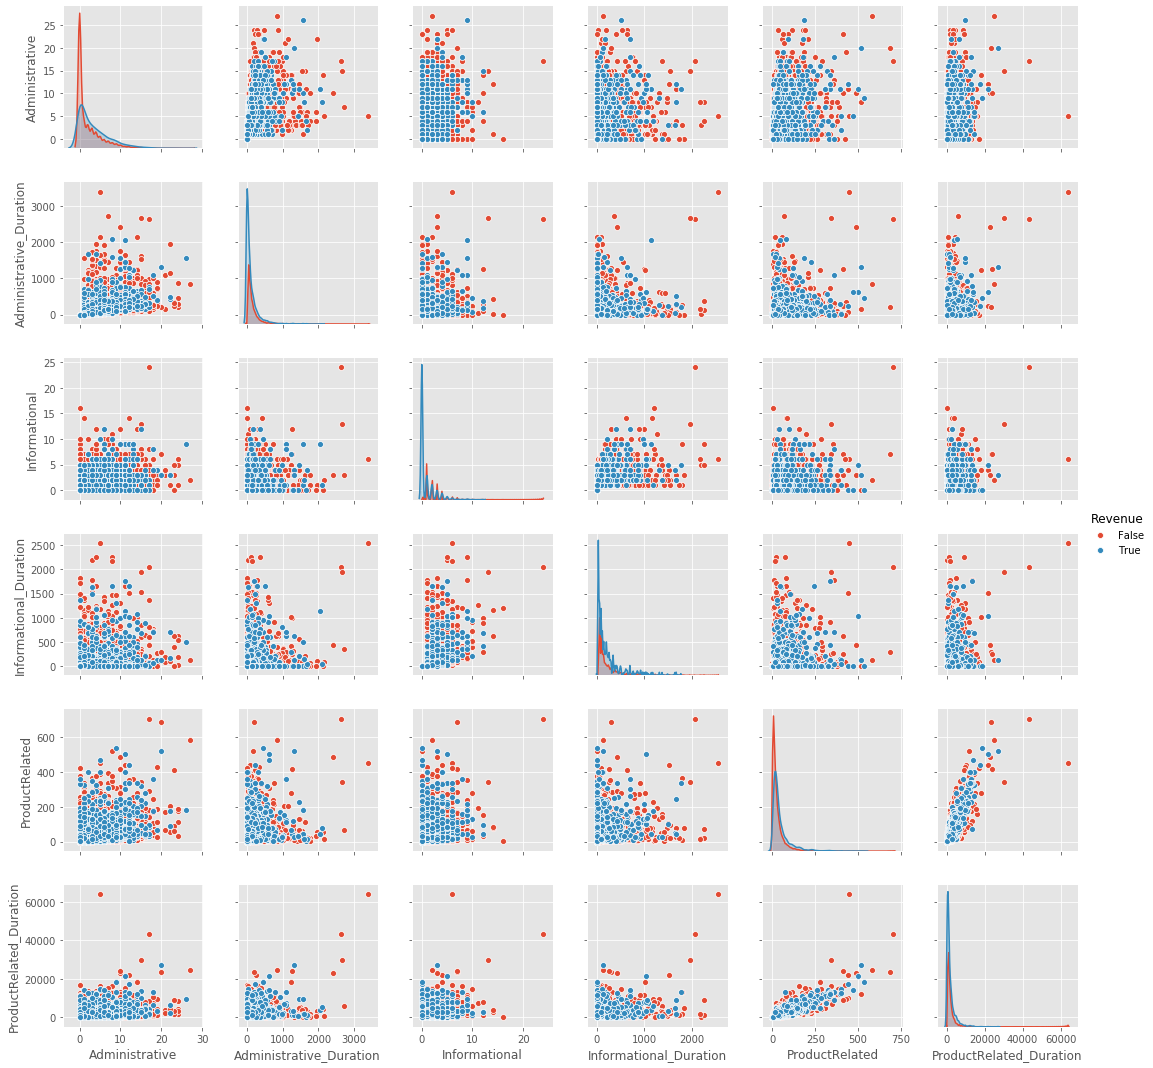

In [7]:
sns.pairplot(data, hue = "Revenue", vars = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration" ] )

In [ ]:
# From above, we observe almost linear relationship between ProductRelated and ProductRelated_Duration. Let's explore it further

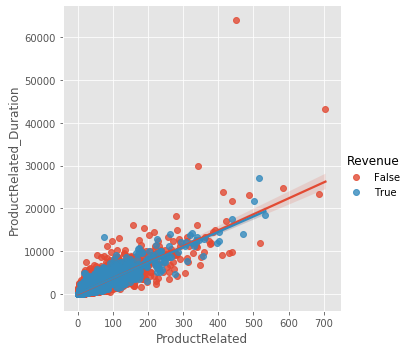

In [8]:
sns.lmplot("ProductRelated", "ProductRelated_Duration", data = data, hue = "Revenue")

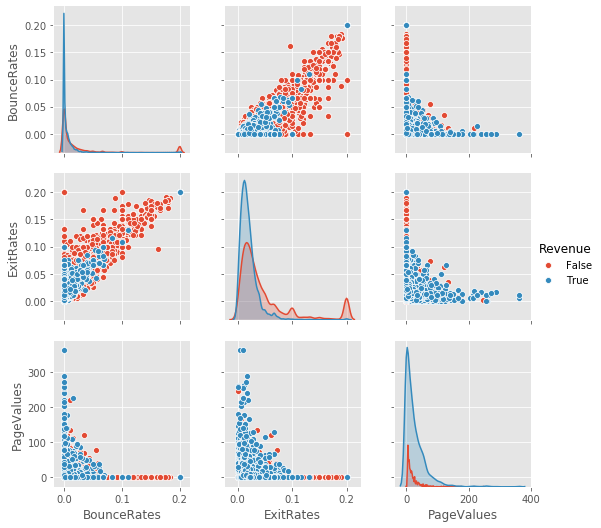

In [9]:
sns.pairplot(data, hue = "Revenue", vars = ["BounceRates", "ExitRates", "PageValues"])

In [ ]:
# Let us explore the relationship of ExitRates and BounceRates

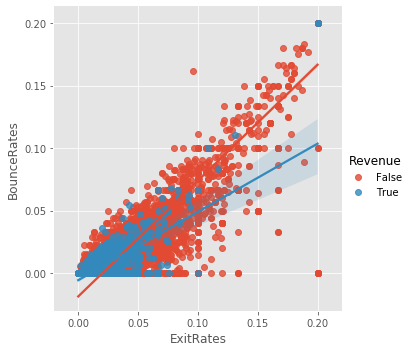

In [9]:
sns.lmplot("ExitRates", "BounceRates", data = data, hue = "Revenue")

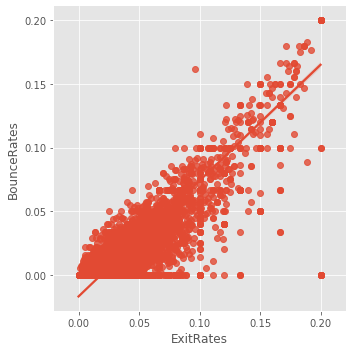

In [11]:
sns.lmplot("ExitRates", "BounceRates", data = data)

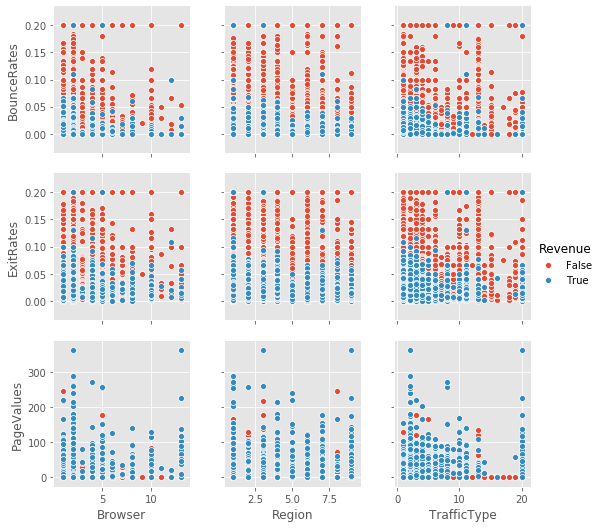

In [10]:
sns.pairplot(data, hue = "Revenue", x_vars = ["Browser", "Region", "TrafficType"], y_vars = ["BounceRates", "ExitRates", "PageValues"])

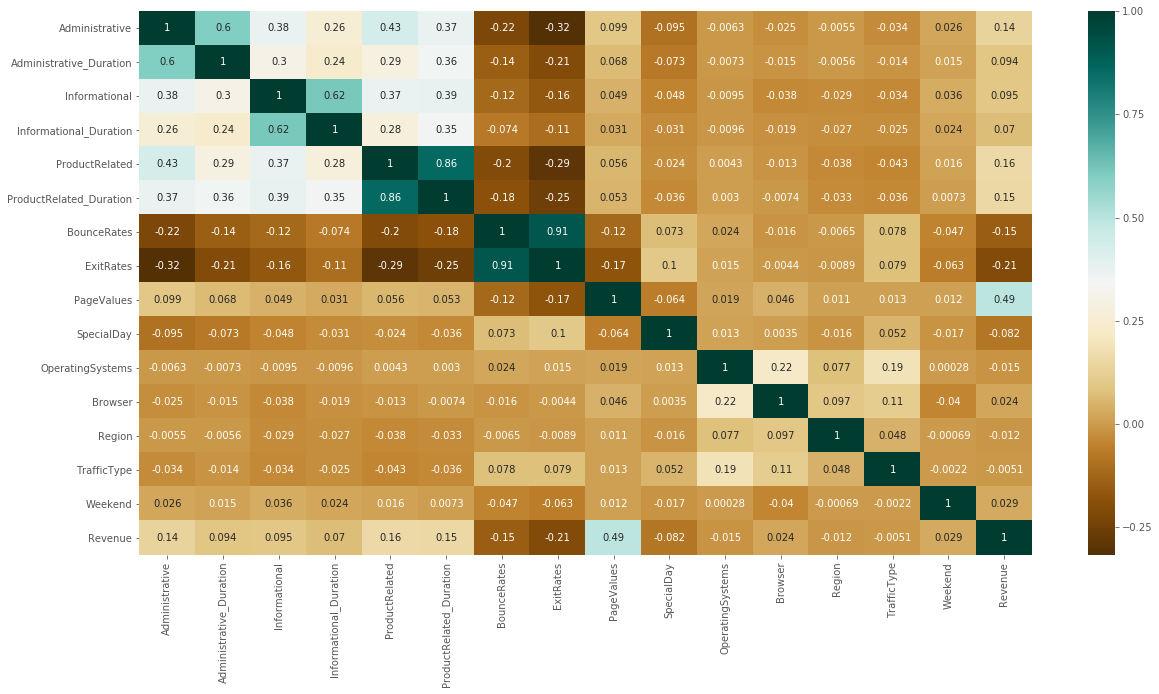

In [121]:
plt.figure(figsize=(20,10))
c_map = data.corr()
sns.heatmap(c_map,cmap= "BrBG",annot=True)


In [ ]:
# The above correlation matrix asserts our previous belief that ExitRates and BounceRates are highly corelated
# ProductRelated and ProductRelated_Duration are also highly related
# Similarly, Administrative and Administrative_Duration are also significantly related
# Also, Informational and Informational_Duration are also related

In [31]:
data["Total_duration"] = data["Administrative_Duration"] + data["Informational_Duration"] + data["ProductRelated_Duration"]
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,627.500000


#### Let us learn user characteristics based on the time spent on the website and types of pages viewed.

In [13]:
# 1. Administrative Duration vs Bounce Rate

In [40]:
x_1 = data.iloc[:, [1, 6]].values
x_1[0]

array([0. , 0.2])

In [41]:
x_1.shape

(12330, 2)

In [42]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(x_1)
    labels = km.labels_
    wcss.append(km.inertia_)

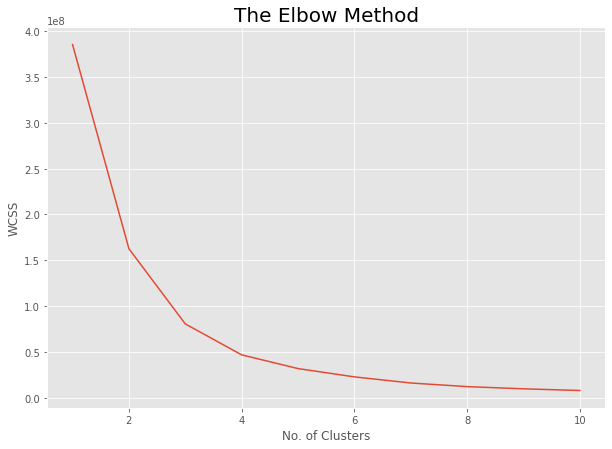

In [43]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# We can see that optimal number of clusters is 3

In [45]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
centroids = km.fit_predict(x_1)

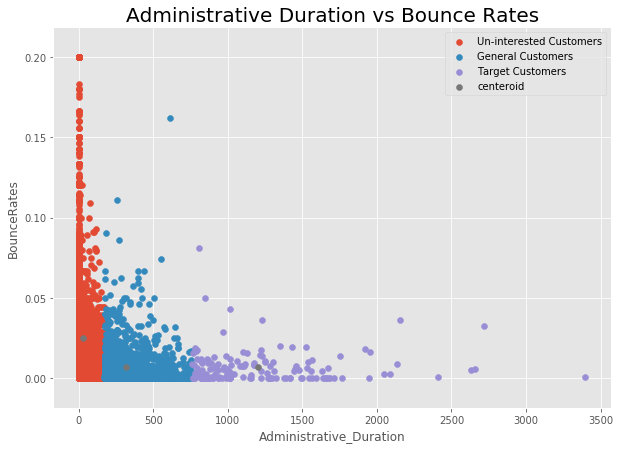

In [46]:
plt.scatter(x_1[centroids == 0, 0], x_1[centroids == 0, 1], label = 'Un-interested Customers')
plt.scatter(x_1[centroids == 1, 0], x_1[centroids == 1, 1], label = 'General Customers')
plt.scatter(x_1[centroids == 2, 0], x_1[centroids == 2, 1], label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

In [47]:
# By looking at the above plot, we can say that the customers who spent a longer administrative duration
# on the website are less likely to bounce off from the website i.e navigating away from the website just 
# after navigating one page of that website.

In [48]:
# 2. Informational Duration Duration vs Page Values

In [49]:
x_2 = data.iloc[:, [3, 6]].values
x_2[0]

array([0. , 0.2])

In [50]:
x_2.shape

(12330, 2)

In [51]:
from sklearn.cluster import KMeans

wcss_2 = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(x_2)
    labels = km.labels_
    wcss_2.append(km.inertia_)

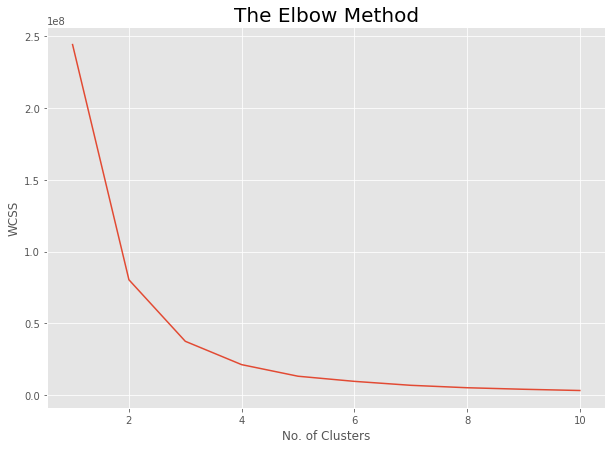

In [52]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss_2)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
centroids = km.fit_predict(x_2)

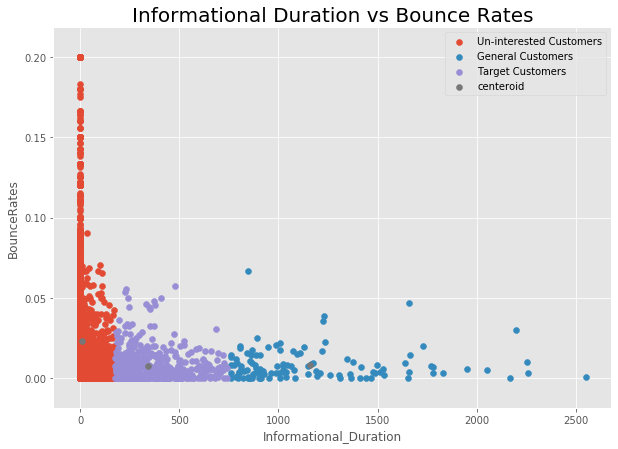

In [54]:
plt.scatter(x_2[centroids == 0, 0], x_2[centroids == 0, 1], label = 'Un-interested Customers')
plt.scatter(x_2[centroids == 1, 0], x_2[centroids == 1, 1], label = 'General Customers')
plt.scatter(x_2[centroids == 2, 0], x_2[centroids == 2, 1], label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('Informational_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

In [55]:
# ProductRelated_Duration vs Bounce Rates

In [56]:
x_4 = data.iloc[:, [5, 6]].values
x_4[0]

array([0. , 0.2])

In [57]:
from sklearn.cluster import KMeans

wcss_4 = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(x_4)
    labels = km.labels_
    wcss_4.append(km.inertia_)

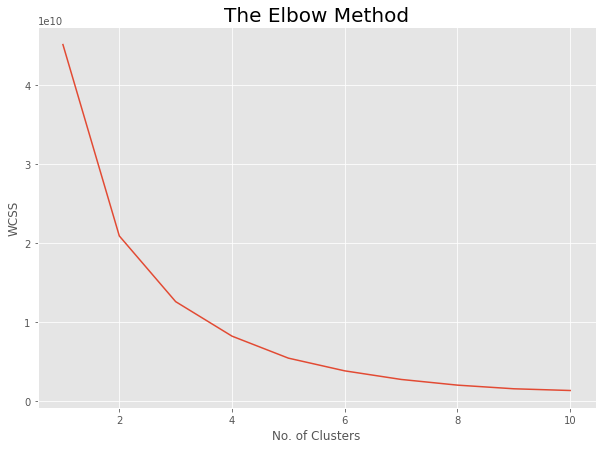

In [58]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss_4)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
centroids = km.fit_predict(x_4)

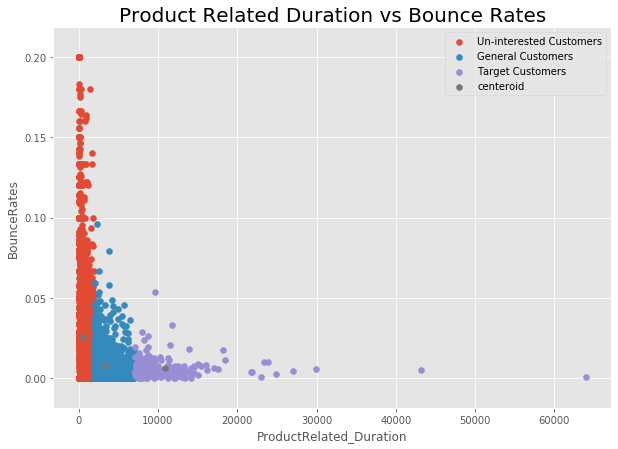

In [60]:
plt.scatter(x_4[centroids == 0, 0], x_4[centroids == 0, 1], label = 'Un-interested Customers')
plt.scatter(x_4[centroids == 1, 0], x_4[centroids == 1, 1], label = 'General Customers')
plt.scatter(x_4[centroids == 2, 0], x_4[centroids == 2, 1], label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label = 'centeroid')

plt.title('Product Related Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

In [61]:
# 4. Total Duration vs Bounce Rates

In [62]:
x_3 = data.iloc[:, [18, 6]].values
x_3[0]

array([0. , 0.2])

In [63]:
from sklearn.cluster import KMeans

wcss_3 = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(x_3)
    labels = km.labels_
    wcss_3.append(km.inertia_)

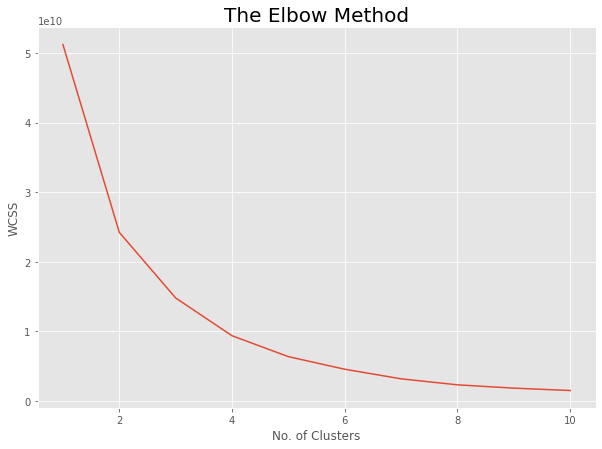

In [64]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss_3)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
centroids = km.fit_predict(x_3)

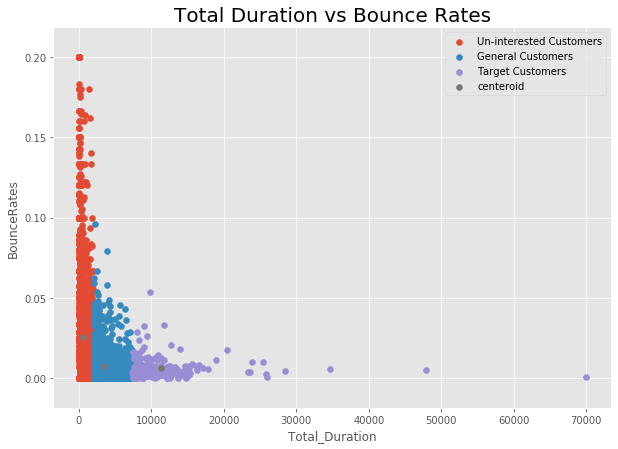

In [69]:
plt.scatter(x_3[centroids == 0, 0], x_3[centroids == 0, 1], label = 'Un-interested Customers')
plt.scatter(x_3[centroids == 1, 0], x_3[centroids == 1, 1], label = 'General Customers')
plt.scatter(x_3[centroids == 2, 0], x_3[centroids == 2, 1], label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label = 'centeroid')

plt.title('Total Duration vs Bounce Rates', fontsize = 20)
plt.xlabel('Total_Duration')
plt.ylabel('BounceRates')
plt.legend()
plt.show()

In [ ]:
# The above graph suggests that customers on a website usually spend more time on pages which have low average Bounce Rates. 
# That shows that pages having higher average bounce rates entertain less duration of customers.

In [73]:
# 5. Total Duration vs Page Values

In [82]:
x_5 = data.iloc[:, [18, 8]].values
x_5[0]

array([0., 0.])

In [83]:
from sklearn.cluster import KMeans

wcss_5 = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(x_5)
    labels = km.labels_
    wcss_5.append(km.inertia_)

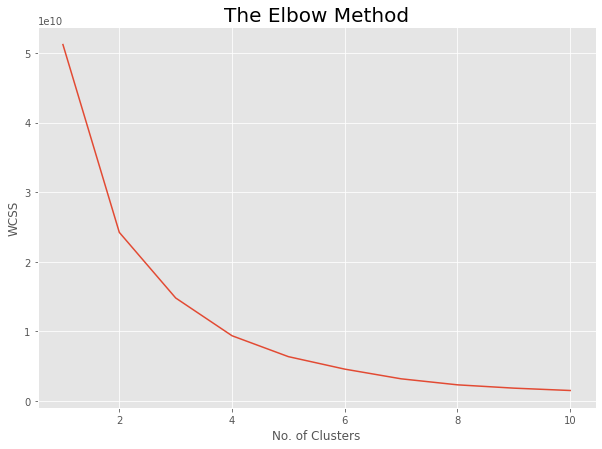

In [84]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss_5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
centroids = km.fit_predict(x_5)

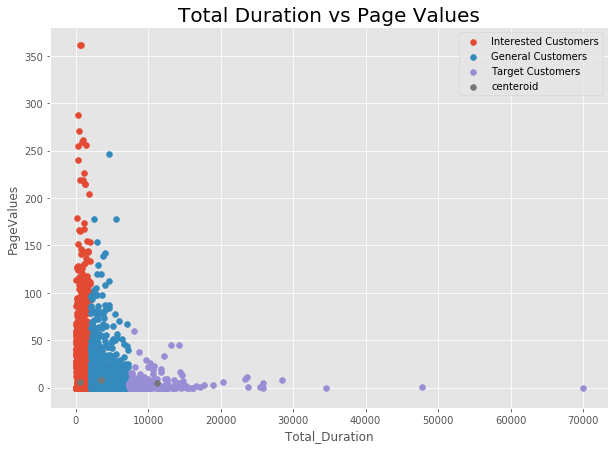

In [90]:
plt.scatter(x_5[centroids == 0, 0], x_5[centroids == 0, 1], label = 'Interested Customers')
plt.scatter(x_5[centroids == 1, 0], x_5[centroids == 1, 1], label = 'General Customers')
plt.scatter(x_5[centroids == 2, 0], x_5[centroids == 2, 1], label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], label = 'centeroid')

plt.title('Total Duration vs Page Values', fontsize = 20)
plt.xlabel('Total_Duration')
plt.ylabel('PageValues')
plt.legend()
plt.show()

In [ ]:
# From above graph, it is surprising to see that people with higher total duration spent on the website, visit the pages
# with low average page values i.e these pages do not result in revenue. This infers that the time spent on pages which
# result in revenue is quite less.